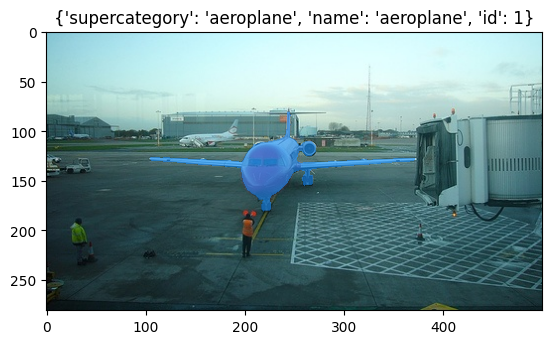

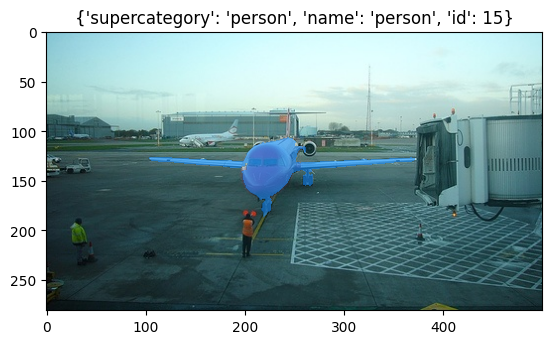

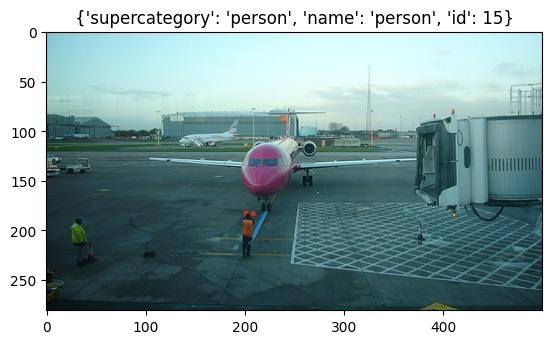

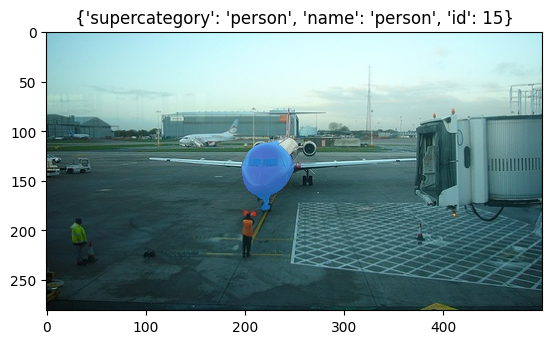

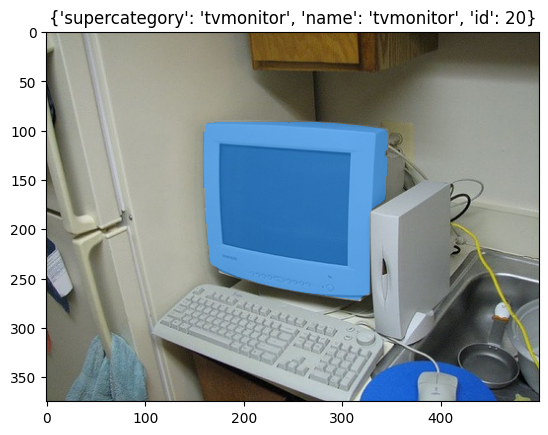

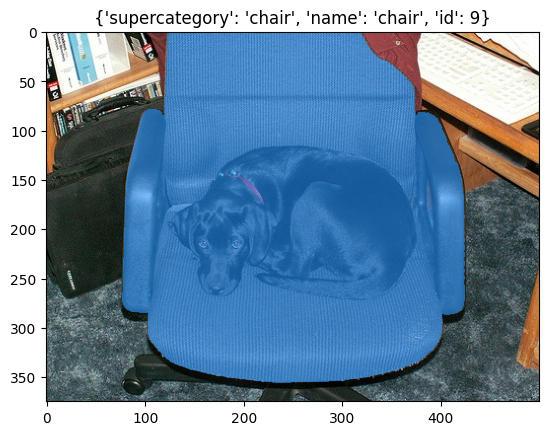

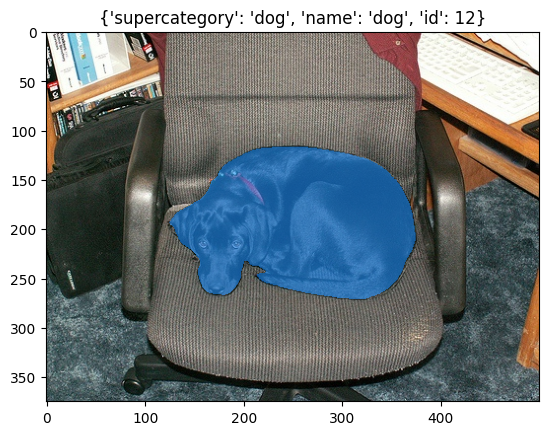

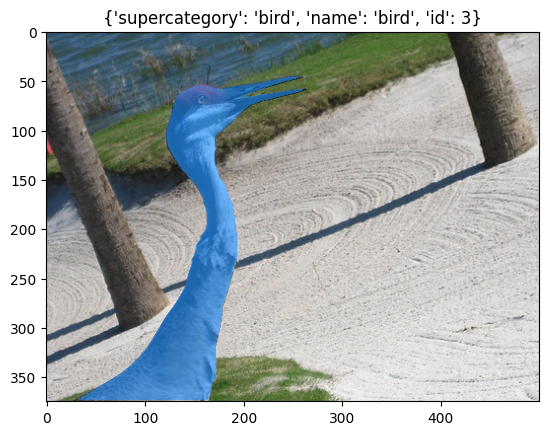

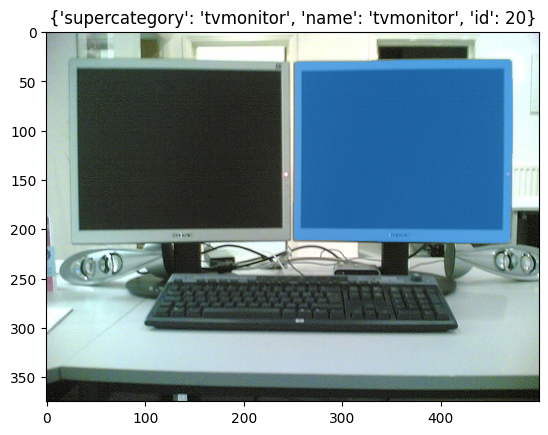

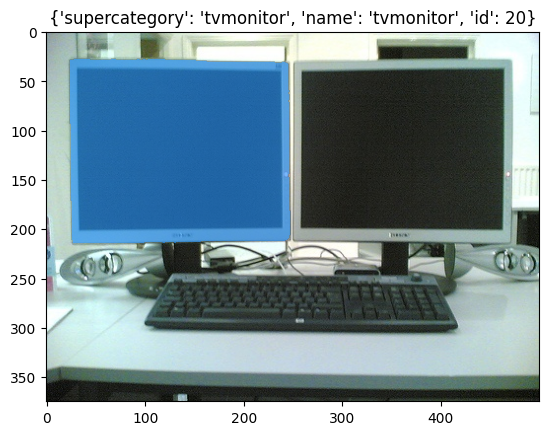

In [3]:

import contextlib
import io
from pycocotools.coco import COCO
from detectron2.data.catalog import MetadataCatalog
from detectron2.utils.file_io import PathManager
import mask2former
import os
import numpy as np

def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
metadata = MetadataCatalog.get("voc12_train_coco_wsss")
json_file = PathManager.get_local_path(metadata.json_file)
with contextlib.redirect_stdout(io.StringIO()):
    coco_file = COCO(json_file)

anns = coco_file.dataset['annotations']
for id, ann in enumerate(anns[:10]):
    mask = coco_file.annToMask(ann)
    img = coco_file.loadImgs([ann['image_id']])[0]

    import cv2
    img = cv2.imread(os.path.join("datasets/VOC2012/JPEGImages/", img['file_name']))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    from matplotlib import pyplot as plt
    plt.imshow(img)
    show_mask(mask, plt.gca())
    plt.title(coco_file.cats[ann['category_id']])
    plt.show()


/home/zhulianghui/miniconda3/envs/mask2former/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


807004


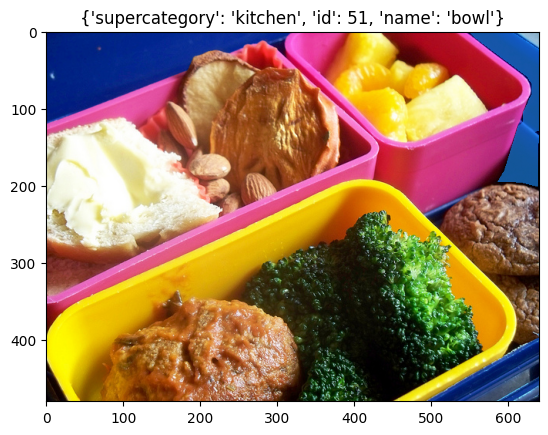

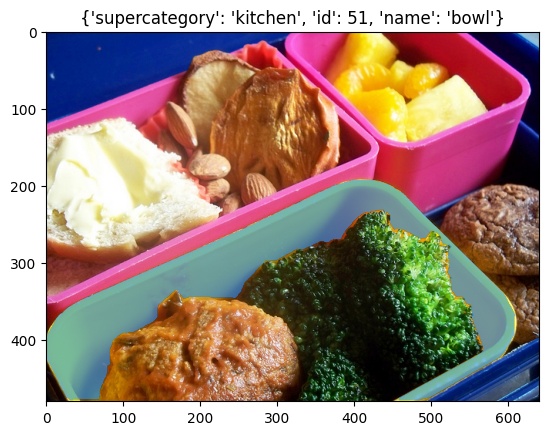

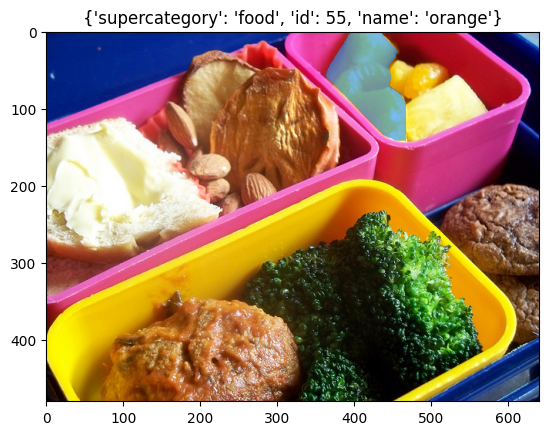

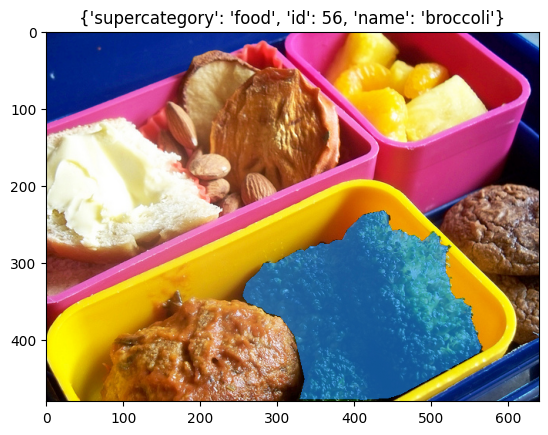

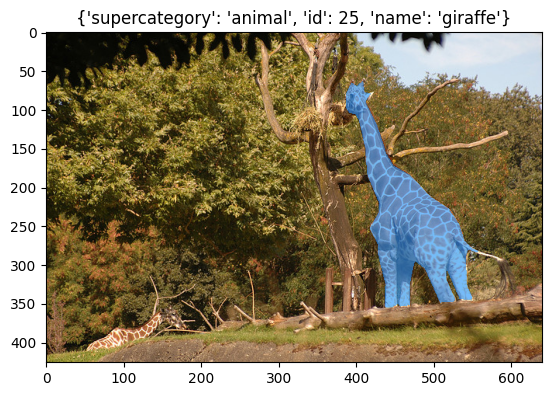

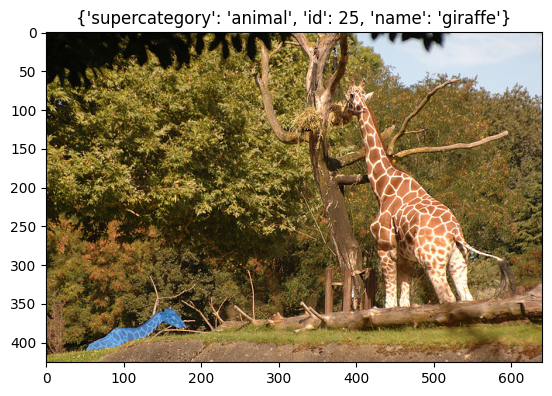

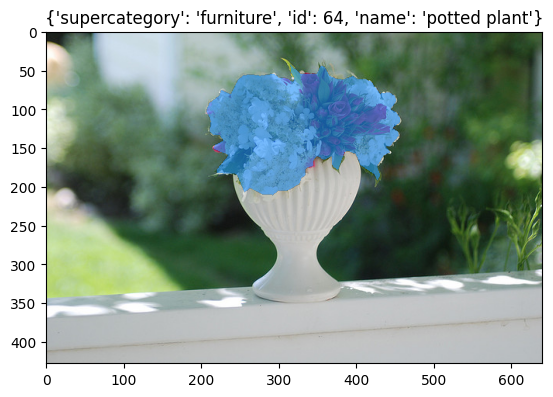

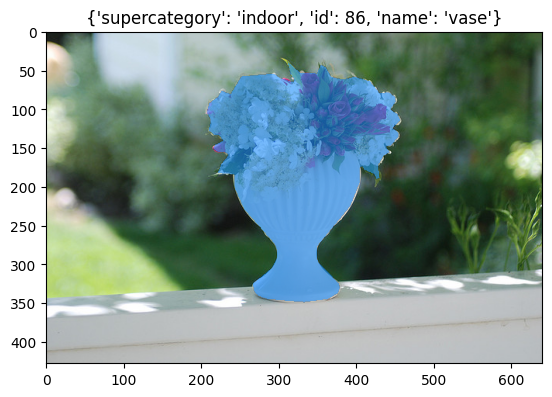

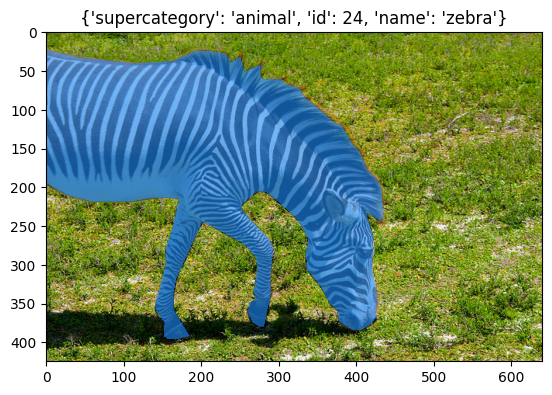

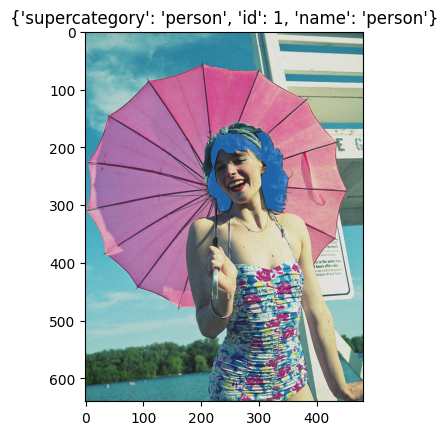

In [1]:

import contextlib
import io
from pycocotools.coco import COCO
from detectron2.data.catalog import MetadataCatalog
from detectron2.utils.file_io import PathManager
import mask2former
import os
import numpy as np

def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
metadata = MetadataCatalog.get("coco_2017_train_wsss")
json_file = PathManager.get_local_path(metadata.json_file)
with contextlib.redirect_stdout(io.StringIO()):
    coco_file = COCO(json_file)

anns = coco_file.dataset['annotations']
print(len(anns))
for id, ann in enumerate(anns[:10]):
    mask = coco_file.annToMask(ann)
    img = coco_file.loadImgs([ann['image_id']])[0]

    import cv2
    img = cv2.imread(os.path.join("datasets/coco/train2017/", img['file_name']))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    from matplotlib import pyplot as plt
    plt.imshow(img)
    show_mask(mask, plt.gca())
    plt.title(coco_file.cats[ann['category_id']])
    plt.show()
